In [2]:
import pandas as pd
import numpy as np

from names import *
from styles import *

import os
import yaml
from functools import reduce

import matplotlib.pyplot as plt
import matplotlib.colors as col

# Read the input

In [3]:
base = pd.read_pickle('data/R1.pkl')

In [4]:
def aggregate(df, method: str):
    d = {c: method for c in df.columns}
    d['filter'] = 'first'
    return df.groupby(['filter', 'group']).agg(d)

In [5]:
agg = aggregate(base, 'mean')

In [6]:
agg['gaze_relative_error'] = agg['gaze_angle_error_filtered'] / agg['gaze_angle_error_source']
agg['pupil_relative_error_else'] = agg['pupil_distance_else_pixel_error_filtered'] / agg[
    'pupil_distance_else_pixel_error_source']
agg['pupil_relative_error_deep_eye'] = agg['pupil_distance_deep_eye_pixel_error_filtered'] / agg[
    'pupil_distance_deep_eye_pixel_error_source']

#agg = agg[agg['gaze_relative_error'] < gaze_t]

In [7]:
agg.head()

sigma  gradient_entropy_image_source  \
filter           group                                         
bilateral_filter 0        NaN                       3.005197   
                 1        NaN                       3.054821   
                 2        NaN                       3.052810   
                 3        NaN                       2.871774   
                 4        NaN                       3.069616   

                        gradient_entropy_image_filtered  \
filter           group                                    
bilateral_filter 0                             2.642885   
                 1                             2.439982   
                 2                             2.379462   
                 3                             2.170750   
                 4                             2.272947   

                        gradient_mutual_information_image  \
filter           group                                      
bilateral_filter 0                               2.067143   
                 1                               1.730396   
                 2                               1.619630   
                 3                               1.437462   
                 4                               1.453344   

                        gabor_entropy_image_source_1.0x  \
filter           group                                    
bilateral_filter 0                             1.725178   
                 1                             2.051230   
                 2                             1.803500   
                 3                             1.990078   
                 4                             2.034273   

                        gabor_entropy_image_filtered_1.0x  \
filter           group                                      
bilateral_filter 0                               1.636136   
                 1                               1.890334   
                 2                               1.551840   
                 3                               1.668826   
                 4                               1.693131   

                        gabor_mutual_information_image_1.0x  \
filter           group                                        
bilateral_filter 0                                 1.493022   
                 1                                 1.696018   
                 2                                 1.340624   
                 3                                 1.428023   
                 4                                 1.449908   

                        gabor_entropy_image_source_0.5x  \
filter           group                                    
bilateral_filter 0                             1.849333   
                 1                             1.832466   
                 2                             1.797151   
                 3                             1.938030   
                 4                             1.904361   

                        gabor_entropy_image_filtered_0.5x  \
filter           group                                      
bilateral_filter 0                               1.823310   
                 1                               1.811750   
                 2                               1.739058   
                 3                               1.861732   
                 4                               1.830443   

                        gabor_mutual_information_image_0.5x  ...    sigma_c  \
filter           group                                       ...              
bilateral_filter 0                                 1.689273  ...   5.000000   
                 1                                 1.708523  ...   8.275862   
                 2                                 1.630535  ...  11.551724   
                 3                                 1.740542  ...  14.827586   
                 4                                 1.720077  ...  18.103448   

                         h  loc  scale  intensity  de

In [8]:
for k, v in pretty_name_map.items():
    agg[v] = agg[k]

agg['Filter'] = agg['filter'].apply(lambda k: filter_name_map[k])
agg['Type'] = agg['filter'].apply(type_map.get)

In [9]:
agg['gradient_conditionalm'] = 1 - (agg['gradient_entropy_iris_filtered'] - agg['gradient_mutual_information_iris'])
agg['gradient_conditional'] = (agg['gradient_entropy_iris_filtered'] - agg['gradient_mutual_information_iris'])
agg['gradient_conditionalmi'] = 1 - (agg['gradient_entropy_image_filtered'] - agg['gradient_mutual_information_image'])
agg['gradient_conditionali'] = (agg['gradient_entropy_image_filtered'] - agg['gradient_mutual_information_image'])

In [10]:
agg['id'] = 1-agg['Iris code similarity']

In [11]:
print(list(agg.columns))

['sigma', 'gradient_entropy_image_source', 'gradient_entropy_image_filtered', 'gradient_mutual_information_image', 'gabor_entropy_image_source_1.0x', 'gabor_entropy_image_filtered_1.0x', 'gabor_mutual_information_image_1.0x', 'gabor_entropy_image_source_0.5x', 'gabor_entropy_image_filtered_0.5x', 'gabor_mutual_information_image_0.5x', 'gabor_entropy_image_source_0.25x', 'gabor_entropy_image_filtered_0.25x', 'gabor_mutual_information_image_0.25x', 'gabor_entropy_image_source_0.125x', 'gabor_entropy_image_filtered_0.125x', 'gabor_mutual_information_image_0.125x', 'gabor_entropy_image_source_0.0625x', 'gabor_entropy_image_filtered_0.0625x', 'gabor_mutual_information_image_0.0625x', 'gabor_entropy_image_source_0.03125x', 'gabor_entropy_image_filtered_0.03125x', 'gabor_mutual_information_image_0.03125x', 'image_normalized_similarity', 'gradient_entropy_iris_source', 'gradient_entropy_iris_filtered', 'gradient_mutual_information_iris', 'gabor_entropy_iris_source_1.0x', 'gabor_entropy_iris_fi

# Plots

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

from thesis.optim.pareto import pareto_frontier, pareto_set

In [13]:
agg.Filter.unique()

array(['Bilateral filter', 'Cauchy noise', 'Gaussian filter',
       'Gaussian noise', 'Laplacian noise', 'Mean filter',
       'Median filter', 'Non-local means', 'Salt-and-pepper noise',
       'Snow noise', 'Comb', 'Comb Reverse', 'Uniform noise'],
      dtype=object)

In [14]:
included = [
    'Bilateral filter',
    'Gaussian filter',
    'Non-local means',
    'Cauchy noise',
    'Snow noise',
    'Comb',
    #'Comb Reverse'
]
ft = agg[agg['Filter'].isin(included)]

/Users/Anton/anaconda3/envs/iaml/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


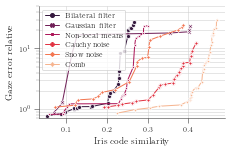

In [14]:
type_markers = {types[k]: v for k, v in {
    'blur': 'o',
    'noise': 's',
    'combo': '^'
}.items()}
#ft = agg

ft['marker'] = [type_markers[t] for t in ft['Type']]

fig, ax = plots('article-col')
rows = []
for f in list(filter_name_map.values()):
    bfilter = ft[ft['Filter'] == f]
    if len(bfilter.index) == 0:
        continue
    s = pareto_set(np.array(bfilter[['Iris code similarity', y]]))
    row = bfilter.iloc[s]
    s = row.sort_values(x)
    rows.append(s)
    

new = pd.concat(rows)

new['id'] = 1-new['Iris code similarity']
    
#sns.scatterplot(x=x, y=y, hue='Filter', style='Filter', markers=True, data=new, edgecolor=None)
sns.lineplot(
    x='id', 
    y=y, 
    hue='Filter', 
    style='Filter', 
    markers=True,
    dashes=False,
    data=new,
    palette='rocket',
    ax=ax
)

ax.set_xlabel('Iris code similarity')

#for r in rows:
#    ax.scatter(r[x], r[y], marker=type_markers[r['Type'].iloc[0]])

plt.ylim((0.7, 50))
plt.yscale('log')
plt.legend()
#plt.xscale('log')
sns.despine()

fig.savefig('out/testa.pdf', bbox_inches='tight')

In [15]:
thresholds = [1.1, 1.6, 2.1, 5.1, 10.1]

limited = [agg[agg['gaze_relative_error'] < t] for t in thresholds]
for df, t in zip(limited, thresholds):
    df['threshold'] = t

res = {}
for l, t in zip(limited, thresholds):
    rows = l.groupby('Filter').apply(lambda df: df.iloc[df['iris_code_similarity'].argmin()])
    res[str(t)] = rows['iris_code_similarity']
#rows = [df.iloc[df['iris_code_similarity'].groupby('Filter').argmin()] for df in limited]

#comb = pd.concat(rows, axis=1).T
#comb['Filter']
#rows[5]['Filter']
ts = pd.DataFrame(res)
ts

/Users/Anton/anaconda3/envs/iaml/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,1.1,1.6,2.1,5.1,10.1
Filter,,,,,
Bilateral filter,0.839441,0.798771,0.783404,0.769814,0.758026
Cauchy noise,0.797122,0.699144,0.687034,0.617177,0.591689
Comb,0.695022,0.593959,0.591683,0.562296,0.547084
Comb Reverse,0.655606,0.632558,0.621277,0.598617,0.580919
Gaussian filter,0.931574,0.910018,0.910018,0.910018,0.886781
Gaussian noise,0.763022,0.740417,0.692051,0.636918,0.591845
Laplacian noise,0.807642,0.754889,0.678438,0.620210,0.587510
Mean filter,0.948990,0.948990,0.948990,0.917788,0.888590
Median filter,0.916655,0.916655,0.916655,0.892372,0.892372


In [16]:
base = agg[(agg['Filter'] != "Comb") & (agg['Filter'] != "Comb Reverse") & (agg['Filter'] != "Snow noise")]

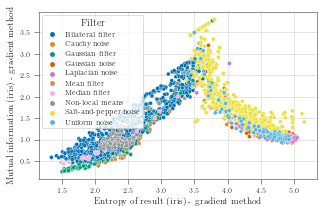

In [17]:
fig, ax = plots('thesis')
sns.scatterplot(
    x='Entropy of result (iris) - gradient method', 
    y='Mutual information (iris) - gradient method', 
    data=base, 
    hue='Filter',
    ax=ax
)

/Users/Anton/anaconda3/envs/iaml/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


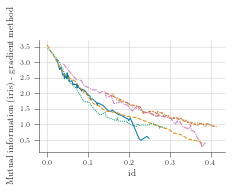

In [18]:
type_markers = {types[k]: v for k, v in {
    'blur': 'o',
    'noise': 's',
    'combo': '^'
}.items()}
#ft = agg

ft['marker'] = [type_markers[t] for t in ft['Type']]

fig, ax = plots('article-col')
rows = []
for f in list(filter_name_map.values()):
    bfilter = ft[ft['Filter'] == f]
    if len(bfilter.index) == 0:
        continue
    s = pareto_set(np.array(bfilter[['id', 'Mutual information (image) - gradient method']]))
    row = bfilter.iloc[s]
    s = row.sort_values(x)
    rows.append(s)
    

new = pd.concat(rows)
    
#sns.scatterplot(x=x, y=y, hue='Filter', style='Filter', markers=True, data=new, edgecolor=None)
sns.lineplot(x='id', legend=False, y='Mutual information (iris) - gradient method', hue='Filter', style='Filter', data=new)

#for r in rows:
#    ax.scatter(r[x], r[y], marker=type_markers[r['Type'].iloc[0]])

#plt.ylim((0.7, 50))
#plt.yscale('log')
#plt.legend()
#plt.xscale('log')
sns.despine()

fig.savefig('out/testa.pdf', bbox_inches='tight')

In [19]:
agg[(agg['Filter'] == 'Bilateral filter') & (agg['Spatial variance'] == 10.17241379310345)]

sigma  gradient_entropy_image_source  \
filter           group                                         
bilateral_filter 420      NaN                       3.048894   
                 421      NaN                       3.201523   
                 422      NaN                       3.041640   
                 423      NaN                       2.957776   
                 424      NaN                       2.899258   
                 425      NaN                       3.005376   
                 426      NaN                       2.901710   
                 427      NaN                       2.974857   
                 428      NaN                       2.983094   
                 429      NaN                       3.044796   
                 430      NaN                       3.080808   
                 431      NaN                       3.080554   
                 432      NaN                       2.979486   
                 433      NaN                       3.030361   
                 434      NaN                       3.107694   
                 435      NaN                       2.984632   
                 436      NaN                       3.059320   
                 437      NaN                       2.971751   
                 438      NaN                       3.040619   
                 439      NaN                       3.240411   
                 440      NaN                       2.902986   
                 441      NaN                       2.932806   
                 442      NaN                       2.862735   
                 443      NaN                       3.044741   
                 444      NaN                       3.079816   
                 445      NaN                       2.956408   
                 446      NaN                       2.986895   
                 447      NaN                       2.995708   
                 448      NaN                       2.966156   
                 449      NaN                       3.015569   

                        gradient_entropy_image_filtered  \
filter           group                                    
bilateral_filter 420                           2.490114   
                 421                           2.307551   
                 422                           1.830594   
                 423                           1.623477   
                 424                           1.319791   
                 425                           1.126953   
                 426                           0.975181   
                 427                           1.001819   
                 428                           0.898999   
                 429                           0.934118   
                 430                           0.880199   
                 431                           0.820522   
                 432                           0.716228   
                 433                           0.777059   
                 434                           0.708232   
                 435                           0.762832   
                 436                           0.748432   
                 437                           0.713984   
                 438                           0.649092   
                 439                           0.671117   
                 440                           0.628398   
                 441                           0.653788   
                 442                           0.632182   
                 443                           0.661386   
                 444                           0.600999   
                 445                           0.637298   
                 446                           0.696004   
                 447                           0.635778   
                 448                           0.659338   
                 449                           0.665897   

                        gradient_mutual_information_image  \
filter           group   

# Compare

In [20]:
names = [1, 1.5, 2, 5, 10]
files = []
for n in names:
    with open(os.path.join('data', 'iris', f'{n}x.yaml')) as f:
        files.append((n, yaml.safe_load(f)['filters']))

In [21]:
rows = []
for n, ftt in files:
    for f, params in ftt.items():
        a = [(agg[n] == v) for n, v in params.items()]
        a = reduce(lambda x, acc: acc & x, a)
        row = agg[(agg['filter'] == f) & a]
        row = row.copy()
        row['s'] = n
        rows.append(row)

n = pd.concat(rows)
ni = n[n['Filter'].isin(included)]

In [22]:
ft['mi'] = ft['gradient_mutual_information_image'] - ft['gradient_conditionali']

a = ft['mi']
b = ft['iris_code_similarity']
np.corrcoef(a, b)

/Users/Anton/anaconda3/envs/iaml/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([[1.        , 0.90815579],
       [0.90815579, 1.        ]])

In [23]:
ft[ft['filter'] == 'bilateral_filter']

sigma  gradient_entropy_image_source  \
filter           group                                         
bilateral_filter 0        NaN                       3.005197   
                 1        NaN                       3.054821   
                 2        NaN                       3.052810   
                 3        NaN                       2.871774   
                 4        NaN                       3.069616   
...                       ...                            ...   
                 895      NaN                       3.023932   
                 896      NaN                       3.091541   
                 897      NaN                       3.234629   
                 898      NaN                       2.835974   
                 899      NaN                       2.973180   

                        gradient_entropy_image_filtered  \
filter           group                                    
bilateral_filter 0                             2.642885   
                 1                             2.439982   
                 2                             2.379462   
                 3                             2.170750   
                 4                             2.272947   
...                                                 ...   
                 895                           0.562485   
                 896                           0.537439   
                 897                           0.500566   
                 898                           0.509221   
                 899                           0.488681   

                        gradient_mutual_information_image  \
filter           group                                      
bilateral_filter 0                               2.067143   
                 1                               1.730396   
                 2                               1.619630   
                 3                               1.437462   
                 4                               1.453344   
...                                                   ...   
                 895                             0.258572   
                 896                             0.246277   
                 897                             0.219428   
                 898                             0.221311   
                 899                             0.223986   

                        gabor_entropy_image_source_1.0x  \
filter           group                                    
bilateral_filter 0                             1.725178   
                 1                             2.051230   
                 2                             1.803500   
                 3                             1.990078   
                 4                             2.034273   
...                                                 ...   
                 895                           2.091494   
                 896                           2.142055   
                 897                           2.122747   
                 898                           1.988682   
                 899                           1.788816   

                        gabor_entropy_image_filtered_1.0x  \
filter           group                                      
bilateral_filter 0                               1.636136   
                 1                               1.890334   
                 2                               1.551840   
                 3                               1.668826   
                 4                               1.693131   
...                                                   ...   
                 895                             0.168815   
                 896                             0.127707   
                 897                             0.111432   
                 898                             0.103030   
                 899                             0.121265   

                        gabor_mutual_information_image_1.0x  \
filt

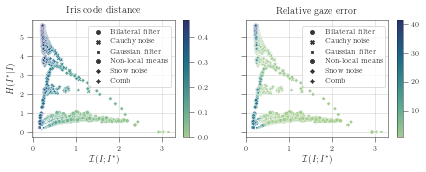

In [47]:
sp = ft #ft[ft[y] < 3]#[ft['Filter'] == 'Gaussian filter']
fig, ax = plt.subplots(1, 2, figsize=set_size('article-full', subplots=(1, 2)), sharey=True, sharex=True)
sts = ft['Filter'].unique()

p1 = 'crest'
p2 = 'crest'

g = sns.scatterplot(
    x='gradient_mutual_information_image', 
    y='gradient_conditionali', 
    hue='id',
    #size='', 
    palette=p1, 
    style='Filter',
    style_order=sts,
    data=sp,
    legend=True,
    ax=ax[0])

g2 = sns.scatterplot(
    x='gradient_mutual_information_image', 
    y='gradient_conditionali', 
    hue=y,
    #size='', 
    palette=p2, 
    style='Filter',
    style_order=sts,
    data=sp,
    legend=False,
    ax=ax[1])

norm = plt.Normalize(sp['id'].min(), sp['id'].max())
sm = plt.cm.ScalarMappable(cmap=p1, norm=norm)
sm.set_array([])


lgd = fig.legend(labels=list(sts), handles=g.legend_.legendHandles[8:], loc='center right', bbox_to_anchor=(0.77, 0.74), ncol=1)
lgd = fig.legend(labels=list(sts), handles=g.legend_.legendHandles[8:], loc='center right', bbox_to_anchor=(0.345, 0.74), ncol=1)
g.legend_.remove()
fig.colorbar(sm, ax=ax[0])

norm = plt.Normalize(sp[y].min(), sp[y].max())
sm = plt.cm.ScalarMappable(cmap=p2, norm=norm)
sm.set_array([])

fig.colorbar(sm, ax=ax[1])

ax[0].set_xlabel('$\mathcal{I}(I;I^*)$')
ax[0].set_ylabel('$H(I^*|I)$')
ax[1].set_xlabel('$\mathcal{I}(I;I^*)$')
ax[1].set_ylabel('$H(I^*|I)$')

ax[0].set_title('Iris code distance')
ax[1].set_title('Relative gaze error')

plt.savefig('out/tb.pdf', bbox_inches='tight', bbox_extra_artists=(lgd,))

## You need to save this for the thesis!!

In [25]:
agg['$\mathcal{I}(I;I^*)$'] = agg['gradient_mutual_information_image']
agg['$H(I^*|I)$'] = agg['gradient_conditionali']
agg['$H(I^*)$'] = agg['gradient_entropy_image_filtered']

In [26]:
style = {
    'text.usetex': True,
    'font.family': ['STIXGeneral'],
    
    # Make legend/label fonts a bit smaller
    
    #'lines.markeredgecolor': 'none',
    #'markers.fillstyle': 'none',

    'lines.linewidth': 0.5,
    'axes.linewidth': 0.5,
    'lines.markersize': 2,
    
    #'grid.color': '000000',
    'grid.linewidth': 0.5,
    
    'axes.labelsize': 9,
    'axes.grid': True,
    'axes.grid.which': 'both',
    'font.size': 9,
    'legend.fontsize': 7,
    'xtick.labelsize': 7,
    'ytick.labelsize': 7,
    
    'xtick.major.width': 0.5,
    'xtick.minor.width': 0.2,
    'ytick.major.width': 0.5,
    'ytick.minor.width': 0.2,
    #"xtick.bottom" : True, 
    #"ytick.left" : True,
    #'xtick.minor.visible': True,
    #'ytick.minor.visible': True,
}

sns.set_theme('paper', 'ticks', rc=style)

#params = {'text.usetex': True, 
#          'text.latex.preamble': [r'\usepackage{stix}', r'\usepackage{amsmath}']}
#plt.rcParams.update(params)

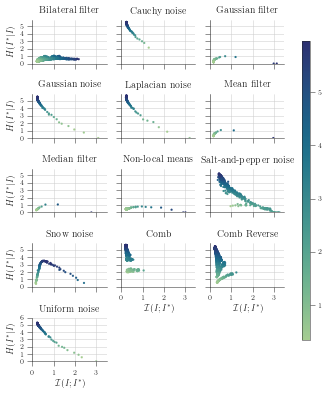

In [27]:
names = agg['Filter'].unique()

grid = sns.FacetGrid(
    data=agg, 
    col='Filter',
    col_order=names,
    palette='crest',
    height=gen_grid('thesis', aspect=1.4, col_wrap=3),
    col_wrap=3,
    aspect=1.4)
grid.map_dataframe(sns.scatterplot, '$\mathcal{I}(I;I^*)$', '$H(I^*|I)$', hue='$H(I^*)$', palette='crest', legend='auto', edgecolor=None)

norm = plt.Normalize(agg['$H(I^*)$'].min(), agg['$H(I^*)$'].max())
sm = plt.cm.ScalarMappable(cmap="crest", norm=norm)
sm.set_array([])
    
#grid.add_legend()
for a, fn in zip(grid.axes, names):
    a.set_xticks(np.linspace(0, 4, 5))
    a.set_title(fn)
    a.set_xlim((0, 3.5))
    a.set_ylim((0, 5.9))
    a.set_yticks(np.linspace(0, 6, 7))
    
    a.xaxis.grid(True, which='minor')
    a.yaxis.grid(True, which='minor')
    
grid.fig.subplots_adjust(right=0.8)

cbar_ax = grid.fig.add_axes([0.85, 0.25, 0.02, 0.7])
grid.fig.colorbar(sm, cax=cbar_ax)
    
grid.fig.subplots_adjust(hspace=0.7, wspace=0.2, top=1, bottom=0.2)

grid.savefig('out/d1.pdf')

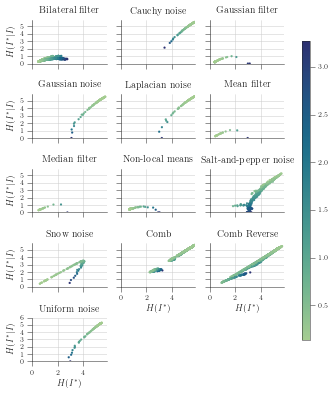

In [28]:
names = agg['Filter'].unique()

grid = sns.FacetGrid(
    data=agg, 
    col='Filter',
    col_order=names,
    palette='crest',
    height=gen_grid('thesis', aspect=1.4, col_wrap=3),
    col_wrap=3,
    aspect=1.4)
grid.map_dataframe(sns.scatterplot, '$H(I^*)$', '$H(I^*|I)$', hue='$\mathcal{I}(I;I^*)$', palette='crest', edgecolor=None)

norm = plt.Normalize(agg['$\mathcal{I}(I;I^*)$'].min(), agg['$\mathcal{I}(I;I^*)$'].max())
sm = plt.cm.ScalarMappable(cmap="crest", norm=norm)
sm.set_array([])

for a, fn in zip(grid.axes, names):
    a.set_xticks(np.linspace(0, 6, 4))
    a.set_title(fn)
    a.set_xlim((0, 5.9))
    a.set_ylim((0, 5.9))
    a.set_yticks(np.linspace(0, 6, 7))
    a.xaxis.grid(True, which='minor')
    a.yaxis.grid(True, which='minor')
    
grid.fig.subplots_adjust(right=0.8)

cbar_ax = grid.fig.add_axes([0.85, 0.25, 0.02, 0.7])
grid.fig.colorbar(sm, cax=cbar_ax)
    
grid.fig.subplots_adjust(hspace=0.7, wspace=0.2, top=1, bottom=0.2)

grid.savefig('out/d2.pdf')

In [153]:
sns.scatterplot(
    data=ft[ft['Filter'] == 'Bilateral filter'],
    x='gradient_mutual_information_image', 
    y='gradient_conditionali', 
    hue=y,
    palette='cividis'
)

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/Users/Anton/.matplotlib/tex.cache/e4dd1317559d50e6928b945e5a982de6.tex
LaTeX2e <2020-02-02> patch level 5
L3 programming layer <2020-02-25>
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2019/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2019/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2019/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2019/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2019/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/local/texlive/2019/texmf-dist/tex/latex/stix/stix.sty

! LaTeX Error: Option clash for package textcomp.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.51         \UndeclareTextCommand
                                  {\textpertenthousand}{T1}
No pages of output.
Transcript written on e4dd1317559d50e6928b945e5a982de6.log.




<Figure size 432x288 with 1 Axes>

In [119]:
from matplotlib import colors as cls

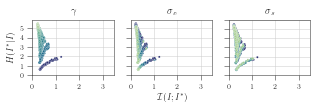

In [150]:
fig, ax = plt.subplots(1, 3, figsize=set_size('thesis', subplots=(1, 3)), sharex=True, sharey=True)

comb = ft[ft['Filter'] == 'Comb Reverse']

sns.scatterplot(
    data=comb,
    x='gradient_mutual_information_image', 
    y='gradient_conditionali', 
    hue='scale',
    palette='crest_r',
    ax=ax[0],
    hue_norm=cls.LogNorm(comb['scale'].min(), comb['scale'].max()),
    legend=False,
)

sns.scatterplot(
    data=comb,
    x='gradient_mutual_information_image', 
    y='gradient_conditionali', 
    hue='sigma_c',
    palette='crest_r',
    ax=ax[1],
    #hue_norm=cls.LogNorm(comb['sigma_c'].min(), comb['sigma_c'].max()),
    legend=False,
)

sns.scatterplot(
    data=comb,
    x='gradient_mutual_information_image', 
    y='gradient_conditionali', 
    hue='sigma_s',
    palette='crest_r',
    ax=ax[2],
    #hue_norm=cls.LogNorm(comb['sigma_s'].min(), comb['sigma_s'].max()),
    legend=False,
)

for i in range(3):
    a = ax[i]
    a.set_xticks(np.linspace(0, 4, 5))
    a.set_title(fn)
    a.set_xlim((0, 3.5))
    a.set_ylim((0, 5.9))
    a.set_yticks(np.linspace(0, 6, 7))

ax[0].set_ylabel('$H(I^*|I)$')
ax[0].set_xlabel('')
ax[2].set_xlabel('')
ax[1].set_xlabel('$\mathcal{I}(I;I^*)$')
ax[0].set_title('$\gamma$')
ax[1].set_title('$\sigma_c$')
ax[2].set_title('$\sigma_s$')

fig.savefig('out/comb.pdf', bbox_inches='tight')

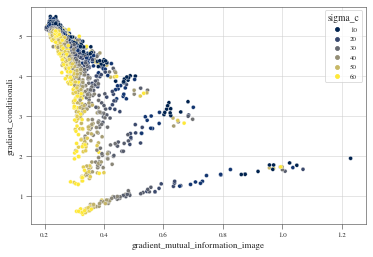

In [80]:
sns.scatterplot(
    data=ft[ft['Filter'] == 'Comb Reverse'],
    x='gradient_mutual_information_image', 
    y='gradient_conditionali', 
    hue='sigma_c',
    palette='cividis'
)

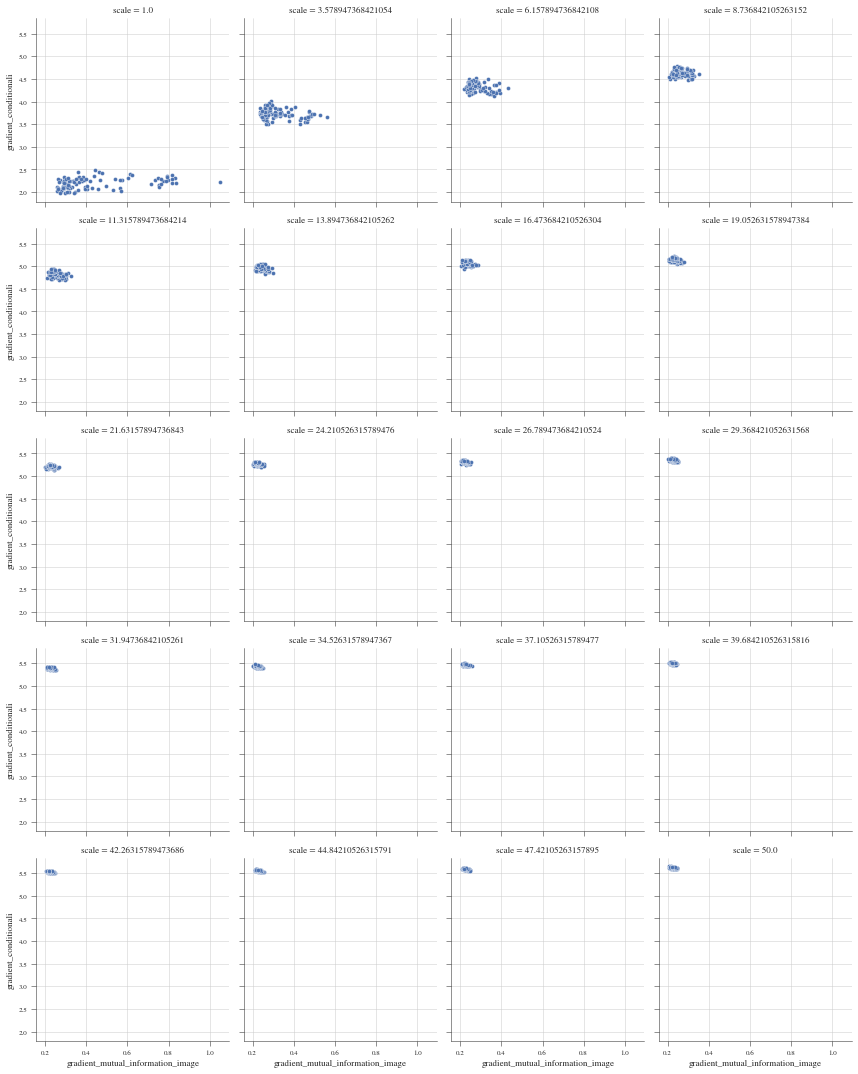

In [77]:
grid = sns.FacetGrid(data=ft[ft['Filter'] == 'Comb'], col='scale', col_wrap=4)
grid.map(sns.scatterplot, 'gradient_mutual_information_image', 'gradient_conditionali')

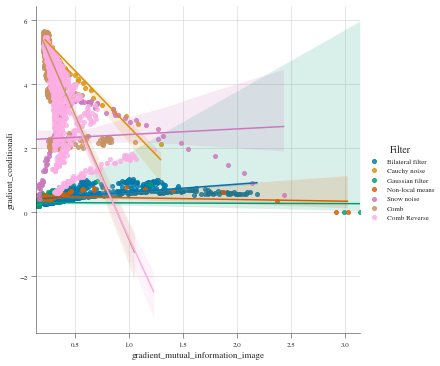

In [271]:
sns.lmplot(
    x='gradient_mutual_information_image', 
    y='gradient_conditionali', 
    hue='Filter',
    data=ft)

In [1]:
grid = sns.FacetGrid(agg, col='Filter', col_wrap=4)
grid.map_dataframe(
    sns.scatterplot, 
    'Mutual information (iris) - gradient method',
    'gradient_conditional', 
    hue='gaze_relative_error',
)
grid.add_legend()

NameError: name 'sns' is not defined

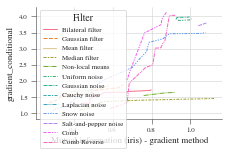

In [26]:
type_markers = {types[k]: v for k, v in {
    'blur': 'o',
    'noise': 's',
    'combo': '^'
}.items()}
ft2 = ft
ft = agg

ft['marker'] = [type_markers[t] for t in ft['Type']]

fig, ax = plots('article-col')
rows = []
for f in list(filter_name_map.values()):
    bfilter = ft[ft['Filter'] == f]
    if len(bfilter.index) == 0:
        continue
    s = pareto_set(np.array(bfilter[['Mutual information (iris) - gradient method', 'gradient_conditionalm']]))
    row = bfilter.iloc[s]
    s = row.sort_values(x)
    rows.append(s)
    

new = pd.concat(rows)
    
#sns.scatterplot(x=x, y=y, hue='Filter', style='Filter', markers=True, data=new, edgecolor=None)
sns.lineplot(y='gradient_conditional', legend=True, x='Mutual information (iris) - gradient method', hue='Filter', style='Filter', data=new)

#for r in rows:
#    ax.scatter(r[x], r[y], marker=type_markers[r['Type'].iloc[0]])

#plt.ylim((0.7, 50))
#plt.yscale('log')
#plt.legend()
#plt.xscale('log')
sns.despine()

fig.savefig('out/testa.pdf', bbox_inches='tight')